In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [34]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 

In [35]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [41]:
def draw_styled_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                            # mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                          #   mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                          #   ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [86]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [88]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.3) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [18]:
draw_landmarks(frame, results)

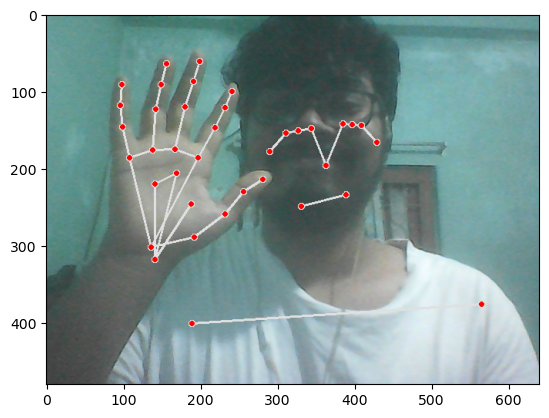

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [23]:
results

mediapipe.python.solution_base.SolutionOutputs

In [25]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [45]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [27]:
DATA_PATH = os.path.join('MP_Data') 

actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [46]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
        
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
 
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [44]:
    cap.release()
    cv2.destroyAllWindows()

In [42]:
    cap.release()
    cv2.destroyAllWindows()


In [47]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [48]:
label_map = {label:num for num, label in enumerate(actions)}


In [49]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [91]:
print(sequences)


[[array([ 0.54070109,  0.48956537, -1.56105971, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.54071611,  0.49124563, -1.45713627, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53732687,  0.4906477 , -1.3698498 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53486222,  0.49043453, -1.35813701, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53423232,  0.48982972, -1.33713579, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53426284,  0.49146566, -1.34674871, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53160548,  0.49576962, -1.44989276, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53163302,  0.49563974, -1.30145133, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53264439,  0.49529669, -1.31972575, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53834921,  0.49530602, -1.42890382, ...,  0.        ,
        0.        ,  0.        ]), array([ 

In [89]:
print(label_map)

{'hello': 0, 'thanks': 1, 'iloveyou': 2}


In [50]:
y = to_categorical(labels).astype(int)

In [52]:
X = np.array(sequences)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [55]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=1500, callbacks=[tb_callback])

Epoch 1/1500
3/3 [==============================] - 5s 868ms/step - loss: 2.8588 - categorical_accuracy: 0.4353
Epoch 2/1500
3/3 [==============================] - 0s 61ms/step - loss: 0.8911 - categorical_accuracy: 0.6353
Epoch 3/1500
3/3 [==============================] - 0s 61ms/step - loss: 1.8973 - categorical_accuracy: 0.6471
Epoch 4/1500
3/3 [==============================] - 0s 61ms/step - loss: 0.6152 - categorical_accuracy: 0.5765
Epoch 5/1500
3/3 [==============================] - 0s 62ms/step - loss: 0.5717 - categorical_accuracy: 0.6706
Epoch 6/1500
3/3 [==============================] - 0s 62ms/step - loss: 0.5305 - categorical_accuracy: 0.6706
Epoch 7/1500
3/3 [==============================] - 0s 69ms/step - loss: 0.5464 - categorical_accuracy: 0.6588
Epoch 8/1500
3/3 [==============================] - 0s 77ms/step - loss: 0.4533 - categorical_accuracy: 0.8235
Epoch 9/1500
3/3 [==============================] - 0s 66ms/step - loss: 0.7837 - categorical_accuracy: 0.7176


3/3 [==============================] - 0s 85ms/step - loss: 18.4658 - categorical_accuracy: 0.2471
Epoch 74/1500
3/3 [==============================] - 0s 94ms/step - loss: 14.4242 - categorical_accuracy: 0.3059
Epoch 75/1500
3/3 [==============================] - 0s 86ms/step - loss: 10.7719 - categorical_accuracy: 0.3765
Epoch 76/1500
3/3 [==============================] - 0s 102ms/step - loss: 9.4545 - categorical_accuracy: 0.4000
Epoch 77/1500
3/3 [==============================] - 0s 92ms/step - loss: 7.5846 - categorical_accuracy: 0.3882
Epoch 78/1500
3/3 [==============================] - 0s 97ms/step - loss: 7.1348 - categorical_accuracy: 0.2824
Epoch 79/1500
3/3 [==============================] - 0s 86ms/step - loss: 7.6253 - categorical_accuracy: 0.3647
Epoch 80/1500
3/3 [==============================] - 0s 95ms/step - loss: 7.2282 - categorical_accuracy: 0.3294
Epoch 81/1500
3/3 [==============================] - 0s 92ms/step - loss: 5.7362 - categorical_accuracy: 0.3882
Ep

3/3 [==============================] - 0s 83ms/step - loss: 0.6338 - categorical_accuracy: 0.7765
Epoch 146/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.5015 - categorical_accuracy: 0.7647
Epoch 147/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.3683 - categorical_accuracy: 0.8353
Epoch 148/1500
3/3 [==============================] - 0s 80ms/step - loss: 0.3599 - categorical_accuracy: 0.8471
Epoch 149/1500
3/3 [==============================] - 0s 80ms/step - loss: 0.3435 - categorical_accuracy: 0.8471
Epoch 150/1500
3/3 [==============================] - 0s 117ms/step - loss: 0.3377 - categorical_accuracy: 0.8353
Epoch 151/1500
3/3 [==============================] - 0s 90ms/step - loss: 0.3212 - categorical_accuracy: 0.8471
Epoch 152/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.3192 - categorical_accuracy: 0.8706
Epoch 153/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.3105 - categorical_accuracy: 0.87

3/3 [==============================] - 0s 79ms/step - loss: 0.1415 - categorical_accuracy: 0.9529
Epoch 218/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.1473 - categorical_accuracy: 0.9412
Epoch 219/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.1346 - categorical_accuracy: 0.9529
Epoch 220/1500
3/3 [==============================] - 0s 79ms/step - loss: 0.1446 - categorical_accuracy: 0.9412
Epoch 221/1500
3/3 [==============================] - 0s 81ms/step - loss: 0.1437 - categorical_accuracy: 0.9412
Epoch 222/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.1351 - categorical_accuracy: 0.9412
Epoch 223/1500
3/3 [==============================] - 0s 80ms/step - loss: 0.1309 - categorical_accuracy: 0.9529
Epoch 224/1500
3/3 [==============================] - 0s 80ms/step - loss: 0.1393 - categorical_accuracy: 0.9412
Epoch 225/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.1293 - categorical_accuracy: 0.952

3/3 [==============================] - 0s 121ms/step - loss: 0.0699 - categorical_accuracy: 0.9765
Epoch 290/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.0706 - categorical_accuracy: 0.9765
Epoch 291/1500
3/3 [==============================] - 0s 89ms/step - loss: 0.0701 - categorical_accuracy: 0.9765
Epoch 292/1500
3/3 [==============================] - 0s 118ms/step - loss: 0.0693 - categorical_accuracy: 0.9765
Epoch 293/1500
3/3 [==============================] - 0s 139ms/step - loss: 0.0695 - categorical_accuracy: 0.9765
Epoch 294/1500
3/3 [==============================] - 0s 178ms/step - loss: 0.0695 - categorical_accuracy: 0.9765
Epoch 295/1500
3/3 [==============================] - 0s 136ms/step - loss: 0.0682 - categorical_accuracy: 0.9765
Epoch 296/1500
3/3 [==============================] - 0s 134ms/step - loss: 0.0682 - categorical_accuracy: 0.9765
Epoch 297/1500
3/3 [==============================] - 0s 137ms/step - loss: 0.0671 - categorical_accuracy

3/3 [==============================] - 0s 89ms/step - loss: 0.0514 - categorical_accuracy: 0.9765
Epoch 362/1500
3/3 [==============================] - 0s 84ms/step - loss: 0.0524 - categorical_accuracy: 0.9765
Epoch 363/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.0505 - categorical_accuracy: 0.9765
Epoch 364/1500
3/3 [==============================] - 0s 93ms/step - loss: 0.0498 - categorical_accuracy: 0.9765
Epoch 365/1500
3/3 [==============================] - 0s 105ms/step - loss: 0.0514 - categorical_accuracy: 0.9765
Epoch 366/1500
3/3 [==============================] - 0s 84ms/step - loss: 0.0507 - categorical_accuracy: 0.9765
Epoch 367/1500
3/3 [==============================] - 0s 85ms/step - loss: 0.0520 - categorical_accuracy: 0.9765
Epoch 368/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.0505 - categorical_accuracy: 0.9765
Epoch 369/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.0513 - categorical_accuracy: 0.97

3/3 [==============================] - 0s 100ms/step - loss: 0.0402 - categorical_accuracy: 0.9882
Epoch 434/1500
3/3 [==============================] - 0s 104ms/step - loss: 0.0404 - categorical_accuracy: 0.9765
Epoch 435/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.0404 - categorical_accuracy: 0.9765
Epoch 436/1500
3/3 [==============================] - 0s 92ms/step - loss: 0.0404 - categorical_accuracy: 0.9765
Epoch 437/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.0394 - categorical_accuracy: 0.9882
Epoch 438/1500
3/3 [==============================] - 0s 92ms/step - loss: 0.0393 - categorical_accuracy: 0.9882
Epoch 439/1500
3/3 [==============================] - 0s 89ms/step - loss: 0.0396 - categorical_accuracy: 0.9882
Epoch 440/1500
3/3 [==============================] - 0s 90ms/step - loss: 0.0390 - categorical_accuracy: 0.9882
Epoch 441/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.0391 - categorical_accuracy: 0

3/3 [==============================] - 0s 94ms/step - loss: 0.0339 - categorical_accuracy: 0.9882
Epoch 506/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.0325 - categorical_accuracy: 0.9882
Epoch 507/1500
3/3 [==============================] - 0s 90ms/step - loss: 0.0330 - categorical_accuracy: 0.9882
Epoch 508/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.0325 - categorical_accuracy: 0.9882
Epoch 509/1500
3/3 [==============================] - 0s 88ms/step - loss: 0.0326 - categorical_accuracy: 1.0000
Epoch 510/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.0322 - categorical_accuracy: 0.9882
Epoch 511/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.0335 - categorical_accuracy: 0.9882
Epoch 512/1500
3/3 [==============================] - 0s 85ms/step - loss: 0.0321 - categorical_accuracy: 1.0000
Epoch 513/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.0342 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 79ms/step - loss: 0.0267 - categorical_accuracy: 0.9882
Epoch 578/1500
3/3 [==============================] - 0s 78ms/step - loss: 0.0294 - categorical_accuracy: 0.9882
Epoch 579/1500
3/3 [==============================] - 0s 80ms/step - loss: 0.0240 - categorical_accuracy: 1.0000
Epoch 580/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.0253 - categorical_accuracy: 0.9882
Epoch 581/1500
3/3 [==============================] - 0s 77ms/step - loss: 0.0233 - categorical_accuracy: 1.0000
Epoch 582/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.0237 - categorical_accuracy: 1.0000
Epoch 583/1500
3/3 [==============================] - 0s 78ms/step - loss: 0.0281 - categorical_accuracy: 0.9882
Epoch 584/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.0245 - categorical_accuracy: 0.9882
Epoch 585/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.0284 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 82ms/step - loss: 0.0131 - categorical_accuracy: 1.0000
Epoch 650/1500
3/3 [==============================] - 0s 84ms/step - loss: 0.0201 - categorical_accuracy: 0.9882
Epoch 651/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.0154 - categorical_accuracy: 1.0000
Epoch 652/1500
3/3 [==============================] - 0s 88ms/step - loss: 0.0133 - categorical_accuracy: 1.0000
Epoch 653/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 654/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 655/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.0158 - categorical_accuracy: 1.0000
Epoch 656/1500
3/3 [==============================] - 0s 92ms/step - loss: 0.0107 - categorical_accuracy: 1.0000
Epoch 657/1500
3/3 [==============================] - 0s 94ms/step - loss: 0.0168 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 86ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 722/1500
3/3 [==============================] - 0s 89ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 723/1500
3/3 [==============================] - 0s 84ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 724/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 725/1500
3/3 [==============================] - 0s 81ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 726/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 727/1500
3/3 [==============================] - 0s 85ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 728/1500
3/3 [==============================] - 0s 84ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 729/1500
3/3 [==============================] - 0s 85ms/step - loss: 0.0037 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 90ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 794/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 795/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 796/1500
3/3 [==============================] - 0s 81ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 797/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 798/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 799/1500
3/3 [==============================] - 0s 102ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 800/1500
3/3 [==============================] - 0s 85ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 801/1500
3/3 [==============================] - 0s 90ms/step - loss: 0.0024 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 89ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 866/1500
3/3 [==============================] - 0s 85ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 867/1500
3/3 [==============================] - 0s 81ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 868/1500
3/3 [==============================] - 0s 89ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 869/1500
3/3 [==============================] - 0s 87ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 870/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 871/1500
3/3 [==============================] - 0s 84ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 872/1500
3/3 [==============================] - 0s 85ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 873/1500
3/3 [==============================] - 0s 84ms/step - loss: 0.0016 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 85ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 938/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 939/1500
3/3 [==============================] - 0s 88ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 940/1500
3/3 [==============================] - 0s 86ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 941/1500
3/3 [==============================] - 0s 82ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 942/1500
3/3 [==============================] - 0s 88ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 943/1500
3/3 [==============================] - 0s 85ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 944/1500
3/3 [==============================] - 0s 83ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 945/1500
3/3 [==============================] - 0s 88ms/step - loss: 0.0011 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 85ms/step - loss: 8.1610e-04 - categorical_accuracy: 1.0000
Epoch 1008/1500
3/3 [==============================] - 0s 85ms/step - loss: 8.1340e-04 - categorical_accuracy: 1.0000
Epoch 1009/1500
3/3 [==============================] - 0s 85ms/step - loss: 8.1967e-04 - categorical_accuracy: 1.0000
Epoch 1010/1500
3/3 [==============================] - 0s 99ms/step - loss: 8.0732e-04 - categorical_accuracy: 1.0000
Epoch 1011/1500
3/3 [==============================] - 0s 85ms/step - loss: 8.0376e-04 - categorical_accuracy: 1.0000
Epoch 1012/1500
3/3 [==============================] - 0s 86ms/step - loss: 8.0673e-04 - categorical_accuracy: 1.0000
Epoch 1013/1500
3/3 [==============================] - 0s 91ms/step - loss: 8.0087e-04 - categorical_accuracy: 1.0000
Epoch 1014/1500
3/3 [==============================] - 0s 81ms/step - loss: 8.0578e-04 - categorical_accuracy: 1.0000
Epoch 1015/1500
3/3 [==============================] - 0s 83ms/step - lo

3/3 [==============================] - 0s 89ms/step - loss: 6.3866e-04 - categorical_accuracy: 1.0000
Epoch 1077/1500
3/3 [==============================] - 0s 87ms/step - loss: 6.4094e-04 - categorical_accuracy: 1.0000
Epoch 1078/1500
3/3 [==============================] - 0s 92ms/step - loss: 6.3422e-04 - categorical_accuracy: 1.0000
Epoch 1079/1500
3/3 [==============================] - 0s 85ms/step - loss: 6.3114e-04 - categorical_accuracy: 1.0000
Epoch 1080/1500
3/3 [==============================] - 0s 91ms/step - loss: 6.3166e-04 - categorical_accuracy: 1.0000
Epoch 1081/1500
3/3 [==============================] - 0s 96ms/step - loss: 6.2901e-04 - categorical_accuracy: 1.0000
Epoch 1082/1500
3/3 [==============================] - 0s 82ms/step - loss: 6.2492e-04 - categorical_accuracy: 1.0000
Epoch 1083/1500
3/3 [==============================] - 0s 84ms/step - loss: 6.2377e-04 - categorical_accuracy: 1.0000
Epoch 1084/1500
3/3 [==============================] - 0s 92ms/step - lo

3/3 [==============================] - 0s 86ms/step - loss: 5.1732e-04 - categorical_accuracy: 1.0000
Epoch 1146/1500
3/3 [==============================] - 0s 84ms/step - loss: 5.1854e-04 - categorical_accuracy: 1.0000
Epoch 1147/1500
3/3 [==============================] - 0s 84ms/step - loss: 5.1698e-04 - categorical_accuracy: 1.0000
Epoch 1148/1500
3/3 [==============================] - 0s 82ms/step - loss: 5.1187e-04 - categorical_accuracy: 1.0000
Epoch 1149/1500
3/3 [==============================] - 0s 86ms/step - loss: 5.0998e-04 - categorical_accuracy: 1.0000
Epoch 1150/1500
3/3 [==============================] - 0s 89ms/step - loss: 5.0857e-04 - categorical_accuracy: 1.0000
Epoch 1151/1500
3/3 [==============================] - 0s 89ms/step - loss: 5.1163e-04 - categorical_accuracy: 1.0000
Epoch 1152/1500
3/3 [==============================] - 0s 84ms/step - loss: 5.0725e-04 - categorical_accuracy: 1.0000
Epoch 1153/1500
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 4.1169e-04 - categorical_accuracy: 1.0000
Epoch 1215/1500
3/3 [==============================] - 0s 89ms/step - loss: 4.1048e-04 - categorical_accuracy: 1.0000
Epoch 1216/1500
3/3 [==============================] - 0s 94ms/step - loss: 4.0954e-04 - categorical_accuracy: 1.0000
Epoch 1217/1500
3/3 [==============================] - 0s 84ms/step - loss: 4.0828e-04 - categorical_accuracy: 1.0000
Epoch 1218/1500
3/3 [==============================] - 0s 88ms/step - loss: 4.0573e-04 - categorical_accuracy: 1.0000
Epoch 1219/1500
3/3 [==============================] - 0s 80ms/step - loss: 4.0483e-04 - categorical_accuracy: 1.0000
Epoch 1220/1500
3/3 [==============================] - 0s 86ms/step - loss: 4.0427e-04 - categorical_accuracy: 1.0000
Epoch 1221/1500
3/3 [==============================] - 0s 79ms/step - loss: 4.0379e-04 - categorical_accuracy: 1.0000
Epoch 1222/1500
3/3 [==============================] - 0s 86ms/step - lo

3/3 [==============================] - 0s 92ms/step - loss: 3.3774e-04 - categorical_accuracy: 1.0000
Epoch 1284/1500
3/3 [==============================] - 0s 82ms/step - loss: 3.3720e-04 - categorical_accuracy: 1.0000
Epoch 1285/1500
3/3 [==============================] - 0s 81ms/step - loss: 3.3294e-04 - categorical_accuracy: 1.0000
Epoch 1286/1500
3/3 [==============================] - 0s 94ms/step - loss: 3.3092e-04 - categorical_accuracy: 1.0000
Epoch 1287/1500
3/3 [==============================] - 0s 82ms/step - loss: 3.2948e-04 - categorical_accuracy: 1.0000
Epoch 1288/1500
3/3 [==============================] - 0s 83ms/step - loss: 3.2886e-04 - categorical_accuracy: 1.0000
Epoch 1289/1500
3/3 [==============================] - 0s 93ms/step - loss: 3.2865e-04 - categorical_accuracy: 1.0000
Epoch 1290/1500
3/3 [==============================] - 0s 85ms/step - loss: 3.2770e-04 - categorical_accuracy: 1.0000
Epoch 1291/1500
3/3 [==============================] - 0s 86ms/step - lo

3/3 [==============================] - 0s 94ms/step - loss: 2.9531e-04 - categorical_accuracy: 1.0000
Epoch 1353/1500
3/3 [==============================] - 0s 90ms/step - loss: 2.9357e-04 - categorical_accuracy: 1.0000
Epoch 1354/1500
3/3 [==============================] - 0s 92ms/step - loss: 2.8741e-04 - categorical_accuracy: 1.0000
Epoch 1355/1500
3/3 [==============================] - 0s 83ms/step - loss: 2.7561e-04 - categorical_accuracy: 1.0000
Epoch 1356/1500
3/3 [==============================] - 0s 88ms/step - loss: 2.7329e-04 - categorical_accuracy: 1.0000
Epoch 1357/1500
3/3 [==============================] - 0s 83ms/step - loss: 2.7804e-04 - categorical_accuracy: 1.0000
Epoch 1358/1500
3/3 [==============================] - 0s 85ms/step - loss: 2.7566e-04 - categorical_accuracy: 1.0000
Epoch 1359/1500
3/3 [==============================] - 0s 86ms/step - loss: 2.7379e-04 - categorical_accuracy: 1.0000
Epoch 1360/1500
3/3 [==============================] - 0s 90ms/step - lo

3/3 [==============================] - 0s 95ms/step - loss: 2.2836e-04 - categorical_accuracy: 1.0000
Epoch 1422/1500
3/3 [==============================] - 0s 80ms/step - loss: 2.2828e-04 - categorical_accuracy: 1.0000
Epoch 1423/1500
3/3 [==============================] - 0s 82ms/step - loss: 2.2723e-04 - categorical_accuracy: 1.0000
Epoch 1424/1500
3/3 [==============================] - 0s 82ms/step - loss: 2.2701e-04 - categorical_accuracy: 1.0000
Epoch 1425/1500
3/3 [==============================] - 0s 85ms/step - loss: 2.2622e-04 - categorical_accuracy: 1.0000
Epoch 1426/1500
3/3 [==============================] - 0s 83ms/step - loss: 2.2537e-04 - categorical_accuracy: 1.0000
Epoch 1427/1500
3/3 [==============================] - 0s 82ms/step - loss: 2.2499e-04 - categorical_accuracy: 1.0000
Epoch 1428/1500
3/3 [==============================] - 0s 86ms/step - loss: 2.2469e-04 - categorical_accuracy: 1.0000
Epoch 1429/1500
3/3 [==============================] - 0s 90ms/step - lo

3/3 [==============================] - 0s 91ms/step - loss: 2.1669e-04 - categorical_accuracy: 1.0000
Epoch 1491/1500
3/3 [==============================] - 0s 83ms/step - loss: 2.1626e-04 - categorical_accuracy: 1.0000
Epoch 1492/1500
3/3 [==============================] - 0s 88ms/step - loss: 2.1548e-04 - categorical_accuracy: 1.0000
Epoch 1493/1500
3/3 [==============================] - 0s 94ms/step - loss: 2.1436e-04 - categorical_accuracy: 1.0000
Epoch 1494/1500
3/3 [==============================] - 0s 83ms/step - loss: 2.1280e-04 - categorical_accuracy: 1.0000
Epoch 1495/1500
3/3 [==============================] - 0s 84ms/step - loss: 2.1267e-04 - categorical_accuracy: 1.0000
Epoch 1496/1500
3/3 [==============================] - 0s 85ms/step - loss: 2.1122e-04 - categorical_accuracy: 1.0000
Epoch 1497/1500
3/3 [==============================] - 0s 84ms/step - loss: 2.0927e-04 - categorical_accuracy: 1.0000
Epoch 1498/1500
3/3 [==============================] - 0s 79ms/step - lo

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [84]:
model.save('SototaV1.h5')

In [62]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [72]:
yhat = model.predict(X_train)

In [73]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [74]:
accuracy_score(ytrue, yhat)

1.0

In [93]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
        if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]
        #print(sentence)
            

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        cv2.waitKey(100)
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [81]:
    cap.release()
    cv2.destroyAllWindows()